# Проект

**Оптимизация публикаций сообщений в мессендежере для повышения информированности адресатов и активизации обратной связи на сообщения.**

**ОГЛАВЛЕНИЕ**

1. [Описание проекта](#first)
2. [Выгрузка и первое изучение данных](#second)
3. [Предобработка и изучение данных](#third)\
    3.1. [Удаление ненужных столбцов](#third_1)\
    3.2. [Изменение типов данных в некоторых столбцах](#third_2)\
    3.3. [Предобработка пропусков в данных](#third_3)\
    3.4. [Проверка дубликатов в данных](#third_4)\
    3.5. [Изучение значений данных, выявление аномальных и редких значений](#third_5)\
    3.6. [Добавление новых столбцов - распределение данных по категориям](#third_6)
4. [Исследовательский анализ данных](#fourth)\
    4.1. [Изучение зависимости длины сообщений и активности обратной связи на сообщения](#fourth_1)\
    4.2. [Изучение зависимости времени дня публикации сообщения и активности обратной связи на сообщения](#fourth_2)\
    4.3. [Изучение зависимости канала публикации сообщения и активности обратной связи на сообщения](#fourth_3)\
    4.4. [Изучение зависимости тематики публикации сообщения и активности обратной связи на сообщения](#fourth_4)   
5. [Общие выводы и итоговые рекомендации](#fifth)

 <a id="first"></a> 
## Описание проекта

**Проблема:** низкая обратная связь на посты, публикуемые в чатах.

**Цель проекта:** дать рекомендации для повышения обратной связи на посты, публикуемые в чатах.  

**Краткий план работы:**
 1. Изучение и предобработка данных для их дальнейшего анализа.
 2. Добавление новых данных - распределение имеющихся данных по категориям.
 3. Исследование данных и формулирование рекомендаций:
  - изучение зависимости длины сообщений и активности обратной связи на сообщения;
  - формулирование рекомендаций по оптимальной длине сообщений для повышения активности обратной связи;
  - изучение зависимости времени дня публикации сообщения и активности обратной связи на сообщения;
  - формулирование рекомендаций по оптимальному времени дня публикаций сообщений для повышения активности обратной связи;
  - изучение зависимости канала публикации сообщения и активности обратной связи на сообщения;
  - изучение зависимости тематики публикации сообщения и активности обратной связи на сообщения.
 4. Формулирование общих выводов и рекомендаций.

 <a id="second"></a> 
## Выгрузка и первое изучение данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [2]:
try:
    df = pd.read_csv('chat_data_clean.csv')
except:
    df = pd.read_csv('/content/drive/MyDrive/datasets/chat_data_clean.csv')

In [3]:
df

,Unnamed: 0,client_msg_id,type,user,ts,latest_reply,team,thread_ts,subtype,channel,file_date,attachments,reactions,text_len,text_words
0,0,ae31e785-257b-4290-a4c6-9721337f67ea,message,U03JYMWQLP5,1.669643e+09,1.669645e+09,TPV9DP0N4,1.669643e+09,NaN,data-analysts-bus,2022-11-28,0,NaN,297,47
1,1,7f644ae8-16d4-4c9e-9c4f-8b2d6df6a28d,message,U03V483FRKM,1.669645e+09,NaN,TPV9DP0N4,1.669643e+09,NaN,data-analysts-bus,2022-11-28,0,"[{'name': 'pray', 'users': ['U03JYMWQLP5'], 'c...",434,63
2,2,NaN,message,U02KVQJHQ5S,1.669647e+09,NaN,NaN,NaN,channel_join,data-analysts-bus,2022-11-28,0,NaN,37,5
3,3,6c5bf2c1-8579-413c-8e8f-ec3a0e3698a8,message,U03JYMWQLP5,1.669709e+09,1.669719e+09,NaN,1.669709e+09,NaN,data-analysts-bus,2022-11-29,0,"[{'name': 'cat-high-five', 'users': ['U040E2D6...",69,12
4,4,b5e3413b-8f04-4192-948b-2423eb3192b2,message,U040E2D6CF2,1.669711e+09,NaN,TPV9DP0N4,1.669709e+09,NaN,data-analysts-bus,2022-11-29,0,NaN,19,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26528,26528,NaN,message,U02KVQJHQ5S,1.669816e+09,NaN,NaN,NaN,channel_join,sql_teamwork_new,2022-11-30,0,NaN,37,5
26529,26529,d7cdfd29-40a3-4f22-b3ce-755975902652,message,U036P42C39Q,1.670506e+09,NaN,TPV9DP0N4,NaN,NaN,sql_teamwork_new,2022-12-08,0,NaN,340,53
26530,26530,b403e184-0a77-42ff-96ee-8813a06c387e,message,U036P42C39Q,1.670605e+09,NaN,TPV9DP0N4,NaN,NaN,sql_teamwork_new,2022-12-09,0,NaN,110,5
26531,26531,NaN,message,U04H3QE10EM,1.674485e+09,NaN,NaN,NaN,channel_join,sql_teamwork_new,2023-01-23,0,NaN,37,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26533 entries, 0 to 26532
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     26533 non-null  int64  
 1   client_msg_id  18262 non-null  object 
 2   type           26533 non-null  object 
 3   user           23643 non-null  object 
 4   ts             26533 non-null  float64
 5   latest_reply   2303 non-null   float64
 6   team           15857 non-null  object 
 7   thread_ts      18222 non-null  float64
 8   subtype        8317 non-null   object 
 9   channel        26533 non-null  object 
 10  file_date      26533 non-null  object 
 11  attachments    26533 non-null  int64  
 12  reactions      4169 non-null   object 
 13  text_len       26533 non-null  int64  
 14  text_words     26533 non-null  int64  
dtypes: float64(3), int64(4), object(8)
memory usage: 3.0+ MB


Исходные данные содержат 13 колонок с информацией.\
В части данных имеются пропуски, у части данных необходимо изменить тип данных.

 <a id="third"></a> 
## Предобработка и изучение данных

 <a id="third_1"></a> 
### Удаление ненужных столбцов

In [5]:
df=df.drop(['Unnamed: 0'], axis=1)

Удалили столбец Unnamed: 0, так как он дублирует индексы в датафрейме.

In [6]:
df.head()

,client_msg_id,type,user,ts,latest_reply,team,thread_ts,subtype,channel,file_date,attachments,reactions,text_len,text_words
0,ae31e785-257b-4290-a4c6-9721337f67ea,message,U03JYMWQLP5,1.669643e+09,1.669645e+09,TPV9DP0N4,1.669643e+09,NaN,data-analysts-bus,2022-11-28,0,NaN,297,47
1,7f644ae8-16d4-4c9e-9c4f-8b2d6df6a28d,message,U03V483FRKM,1.669645e+09,NaN,TPV9DP0N4,1.669643e+09,NaN,data-analysts-bus,2022-11-28,0,"[{'name': 'pray', 'users': ['U03JYMWQLP5'], 'c...",434,63
2,NaN,message,U02KVQJHQ5S,1.669647e+09,NaN,NaN,NaN,channel_join,data-analysts-bus,2022-11-28,0,NaN,37,5
3,6c5bf2c1-8579-413c-8e8f-ec3a0e3698a8,message,U03JYMWQLP5,1.669709e+09,1.669719e+09,NaN,1.669709e+09,NaN,data-analysts-bus,2022-11-29,0,"[{'name': 'cat-high-five', 'users': ['U040E2D6...",69,12
4,b5e3413b-8f04-4192-948b-2423eb3192b2,message,U040E2D6CF2,1.669711e+09,NaN,TPV9DP0N4,1.669709e+09,NaN,data-analysts-bus,2022-11-29,0,NaN,19,2


 <a id="third_2"></a> 
### Изменение типов данных в некоторых столбцах

 - **ts** - дату поста привели к формату даты и времени:

In [7]:
df['ts'] = pd.to_datetime(df['ts'], unit='s').dt.round('1s')
df['ts']

0       2022-11-28 13:49:23
1       2022-11-28 14:24:08
2       2022-11-28 14:48:50
3       2022-11-29 08:08:12
4       2022-11-29 08:32:32
                ...        
26528   2022-11-30 13:44:46
26529   2022-12-08 13:23:11
26530   2022-12-09 16:57:37
26531   2023-01-23 14:42:06
26532   2023-02-01 08:11:59
Name: ts, Length: 26533, dtype: datetime64[ns]

 - **thread_ts** - дату треда привели к формату даты и времени:

In [8]:
df['thread_ts'] = pd.to_datetime(df['thread_ts'], unit='s').dt.round('1s')
df['thread_ts']

0       2022-11-28 13:49:23
1       2022-11-28 13:49:23
2                       NaT
3       2022-11-29 08:08:12
4       2022-11-29 08:08:12
                ...        
26528                   NaT
26529                   NaT
26530                   NaT
26531                   NaT
26532                   NaT
Name: thread_ts, Length: 26533, dtype: datetime64[ns]

 - **latest_reply** - дату ответа привели к формату даты и времени:

In [9]:
df['latest_reply'] = pd.to_datetime(df['latest_reply'], unit='s').dt.round('1s')
df['latest_reply']

0       2022-11-28 14:24:08
1                       NaT
2                       NaT
3       2022-11-29 10:56:57
4                       NaT
                ...        
26528                   NaT
26529                   NaT
26530                   NaT
26531                   NaT
26532                   NaT
Name: latest_reply, Length: 26533, dtype: datetime64[ns]

 - **channel** - наименование каналов привели к формату строки:

In [10]:
df['channel'] = df['channel'].astype(str)

 - **file_date** - дату файла привели к формату даты:

In [11]:
df['file_date'] = pd.to_datetime(df['file_date'])
df['file_date']

0       2022-11-28
1       2022-11-28
2       2022-11-28
3       2022-11-29
4       2022-11-29
           ...    
26528   2022-11-30
26529   2022-12-08
26530   2022-12-09
26531   2023-01-23
26532   2023-02-01
Name: file_date, Length: 26533, dtype: datetime64[ns]

 <a id="third_3"></a> 
### Предобработка пропусков в данных

 - **client_msg_id** - id сообщения:

In [12]:
print('Количество пропущенных значений id сообщения:', len(df[df['client_msg_id'].isna()]), ', или', round(len(df[df['client_msg_id'].isna()])/len(df['client_msg_id'])*100), '%')

Количество пропущенных значений id сообщения: 8271 , или 31 %


Мы не можем заполнить пропуски в данном столбце, пропуски оставили не заполненными.

 - **type** - тип поста:

Пропусков нет.

- **user** - id пользователя:

In [13]:
print('Количество пропущенных значений id пользователя:', len(df[df['user'].isna()]), ', или', round(len(df[df['user'].isna()])/len(df['user'])*100), '%')

Количество пропущенных значений id пользователя: 2890 , или 11 %


Мы не можем знать, какой именно пользователь написал пост в чате, поэтому не можем заполнить пропуски. Пропуски оставили не заполненными.

In [14]:
d1 = df[df['user'].isna()==True] # проверяем, соответствуют ли пропуски в других столбцах пропускам в столбце user
d1.count()

client_msg_id       0
type             2890
user                0
ts               2890
latest_reply      913
team                2
thread_ts         919
subtype          2890
channel          2890
file_date        2890
attachments      2890
reactions          59
text_len         2890
text_words       2890
dtype: int64

Мы видим, что пропускам в столбце user соответствуют пропуски в столбце client_msg_id. Стоит учитывать, что пропусков id сообщений больше, чем пропусков id пользователя.

- **ts** - дата поста:

Пропусков нет.

- **thread_ts** - дата треда:

In [15]:
print('Количество пропущенных значений даты треда:', len(df[df['thread_ts'].isna()]), ', или', round(len(df[df['thread_ts'].isna()])/len(df['user'])*100), '%')

Количество пропущенных значений даты треда: 8311 , или 31 %


Мы не можем заполнить пропущенные значения в дате треда, поэтому мы оставили эти пропуски не заполненными.

- **latest_reply** - дата ответа:

Большая часть данных в столбце latest_reply содержит пропуски. Данный столбец может содержать пропуски, так как на сообщения могло не быть ответов. Пропуски оставили не заполненными.

- **team** - факт вхождения в неизвестную группу (?):

Значительная часть данных в данном столбце не заполнена.  Мы не можем заполнить пропущенные значения в данном столбце, поэтому мы оставили эти пропуски не заполненными.

 - **subtype** - метка действия пользователя:

Большая часть данных в столбце subtype содержит пропуски. Мы не можем заполнить пропущенные значения в данном столбце, поэтому мы оставили эти пропуски не заполненными.

 - **channel** - канал:

Пропусков нет.

 - **file_date** - дата файла:

Пропусков нет.

In [16]:
df['attachments'].unique()

array([0, 1, 2, 3, 4, 5])

Отсутствие пропусков является странным фактом, так как не к каждому сообщению прикрепляется файл.\
Мы посмоотрели уникальные значения в столбце attachments - прикреплённые файлы: мы видим, что часть данных в этом столбце равна 0, что вероятно означает, что к данным сообщениям файлы не прикреплялись. Вероятно, дата файла для значений 0 в столбце attachments также проставлялась: данное предполжение проверено в следующем разделе 3.5 настоящего проекта.

 - **attachments** - прикреплённые файлы:

Пропусков нет.

Отсутствие пропусков является странным фактом, так как не к каждому сообщению прикрепляется файл.
Часть данных в этом столбце равна 0, что вероятно означает, что к данным сообщениям файлы не прикреплялись.

 - **reactions** - реакции:     

Большая часть данных в столбце reactions содержит пропуски. Данный столбец может содержать пропуски, так как на сообщения могло не быть реакций. Пропуски оставили не заполненными.   

 - **text_len** - длина текста сообщения:

Пропусков нет.

 - **text_words** - количество слов в сообщении:

Пропусков нет.

 <a id="third_4"></a> 
### Проверка дубликатов в данных

#### Явные дубликаты в датафрейме:

In [17]:
df.duplicated().sum()

369

Данные содержат явные дубликаты.

In [18]:
df.drop_duplicates()

,client_msg_id,type,user,ts,latest_reply,team,thread_ts,subtype,channel,file_date,attachments,reactions,text_len,text_words
0,ae31e785-257b-4290-a4c6-9721337f67ea,message,U03JYMWQLP5,2022-11-28 13:49:23,2022-11-28 14:24:08,TPV9DP0N4,2022-11-28 13:49:23,NaN,data-analysts-bus,2022-11-28,0,NaN,297,47
1,7f644ae8-16d4-4c9e-9c4f-8b2d6df6a28d,message,U03V483FRKM,2022-11-28 14:24:08,NaT,TPV9DP0N4,2022-11-28 13:49:23,NaN,data-analysts-bus,2022-11-28,0,"[{'name': 'pray', 'users': ['U03JYMWQLP5'], 'c...",434,63
2,NaN,message,U02KVQJHQ5S,2022-11-28 14:48:50,NaT,NaN,NaT,channel_join,data-analysts-bus,2022-11-28,0,NaN,37,5
3,6c5bf2c1-8579-413c-8e8f-ec3a0e3698a8,message,U03JYMWQLP5,2022-11-29 08:08:12,2022-11-29 10:56:57,NaN,2022-11-29 08:08:12,NaN,data-analysts-bus,2022-11-29,0,"[{'name': 'cat-high-five', 'users': ['U040E2D6...",69,12
4,b5e3413b-8f04-4192-948b-2423eb3192b2,message,U040E2D6CF2,2022-11-29 08:32:32,NaT,TPV9DP0N4,2022-11-29 08:08:12,NaN,data-analysts-bus,2022-11-29,0,NaN,19,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26528,NaN,message,U02KVQJHQ5S,2022-11-30 13:44:46,NaT,NaN,NaT,channel_join,sql_teamwork_new,2022-11-30,0,NaN,37,5
26529,d7cdfd29-40a3-4f22-b3ce-755975902652,message,U036P42C39Q,2022-12-08 13:23:11,NaT,TPV9DP0N4,NaT,NaN,sql_teamwork_new,2022-12-08,0,NaN,340,53
26530,b403e184-0a77-42ff-96ee-8813a06c387e,message,U036P42C39Q,2022-12-09 16:57:37,NaT,TPV9DP0N4,NaT,NaN,sql_teamwork_new,2022-12-09,0,NaN,110,5
26531,NaN,message,U04H3QE10EM,2023-01-23 14:42:06,NaT,NaN,NaT,channel_join,sql_teamwork_new,2023-01-23,0,NaN,37,5


Удалили явные дубликаты.

#### Явные дубликаты в отдельных столбцах:
 
Явные дубликаты не допустимы только в столбце client_msg_id.

In [19]:
df[df['client_msg_id'].duplicated()]['client_msg_id'].unique() # смотрим, есть в столбце client_msg_id значения дубликатов, кроме пропусков

array([nan], dtype=object)

Дубликатов в столбце client_msg_id нет.

#### Неявные дубликаты:

Неявные дубликаты могут содержаться только в некоторых столбцах:

 - **type**:

In [20]:
df['type'].unique()

array(['message'], dtype=object)

Данные столбца type содержат только одно значение - "message".\
Данный столбец не имеет пропусков и во всех ячейках содержит одинаковое значение, поэтому данный столбец не имеет ценности для исследования.\
Мы удалили данный столбец.

In [21]:
df=df.drop(['type'], axis=1)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26533 entries, 0 to 26532
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   client_msg_id  18262 non-null  object        
 1   user           23643 non-null  object        
 2   ts             26533 non-null  datetime64[ns]
 3   latest_reply   2303 non-null   datetime64[ns]
 4   team           15857 non-null  object        
 5   thread_ts      18222 non-null  datetime64[ns]
 6   subtype        8317 non-null   object        
 7   channel        26533 non-null  object        
 8   file_date      26533 non-null  datetime64[ns]
 9   attachments    26533 non-null  int64         
 10  reactions      4169 non-null   object        
 11  text_len       26533 non-null  int64         
 12  text_words     26533 non-null  int64         
dtypes: datetime64[ns](4), int64(3), object(6)
memory usage: 2.6+ MB


 - **subtype**:

In [23]:
df['subtype'].unique()

array([nan, 'channel_join', 'bot_remove', 'thread_broadcast',
       'channel_unarchive', 'channel_leave', 'bot_message',
       'channel_purpose', 'tombstone', 'channel_name'], dtype=object)

Метки действий пользователей, если соотносить их названия с предполагаемым смыслом, не имеют неявных дубликатов.

 - **channel**:

In [24]:
df['channel'].nunique()

571

In [25]:
df['channel'].unique()

array(['data-analysts-bus', 'datatracker_logs', 'data_complaints',
       'data_edteam_info', 'da_42_exerciser_1', 'da_42_exerciser_2',
       'da_42_projects_1', 'da_42_projects_2', 'da_50_info',
       'da_50_library', 'da_50_teamwork', 'da_52_exerciser', 'da_52_info',
       'da_52_library', 'da_52_projects', 'da_52_teamwork',
       'da_53_exerciser_1', 'da_53_exerciser_2', 'da_53_info',
       'da_53_library', 'da_53_projects_1', 'da_53_projects_2',
       'da_53_teamwork', 'da_54_exerciser_01', 'da_54_exerciser_02',
       'da_54_info', 'da_54_library', 'da_54_projects_01',
       'da_54_projects_02', 'da_54_teamwork', 'da_55_exerciser',
       'da_55_info', 'da_55_library', 'da_55_projects', 'da_55_teamwork',
       'da_56b_exerciser', 'da_56b_info', 'da_56b_library',
       'da_56b_projects', 'da_56b_teamwork', 'da_56_exerciser_1',
       'da_56_exerciser_2', 'da_56_info', 'da_56_library',
       'da_56_projects_1', 'da_56_projects_2', 'da_56_teamwork',
       'da_58_digitalpro

Столбец Channel имеет 571 уникальное значение.\
В разделе 3.6 настоящего проекта каналы в целях анализа будут распределены по категориям, что невилирует эффект неявных дубликатов, если такие есть.

 - **reactions**:

In [26]:
df['reactions'].nunique()

2661

In [27]:
df['reactions'].unique()

array([nan, "[{'name': 'pray', 'users': ['U03JYMWQLP5'], 'count': 1}]",
       "[{'name': 'cat-high-five', 'users': ['U040E2D6CF2'], 'count': 1}]",
       ..., "[{'name': 'pray', 'users': ['U03RSC0RSBU'], 'count': 1}]",
       "[{'name': 'cat-high-five', 'users': ['U02QK4VR38F'], 'count': 1}]",
       "[{'name': 'cat-high-five', 'users': ['U044T2TLGH3'], 'count': 1}]"],
      dtype=object)

Столбец Reactions имеет 2661 уникальное значение.\
В настоящем проекте мы не будем анализировать смысл реакций, а только их количество, поэтому наличие неявных дубликатов в реакциях не повлияет на результаты нашего анализа.

 <a id="third_5"></a> 
### Изучение значений данных, выявление аномальных и редких значений

 - **Изучение данных в столбцах, содержащих даты и время:\
 ts,\
 latest_reply,\
 thread_ts,\
 file_date**

In [28]:
df['ts'].min()

Timestamp('2022-10-21 09:00:00')

In [29]:
df['ts'].max()

Timestamp('2023-02-09 11:02:04')

Мы видим, что датафрейм содержит данные за период с 21 октября 2022г. по 2 сентября 2023г.

In [30]:
dates_check = df[df['latest_reply'].isna()==False][['ts','latest_reply','thread_ts','file_date']] # создали рабочий датафрейм для изучения дат и времени последних ответов
dates_check.head()

,ts,latest_reply,thread_ts,file_date
0,2022-11-28 13:49:23,2022-11-28 14:24:08,2022-11-28 13:49:23,2022-11-28
3,2022-11-29 08:08:12,2022-11-29 10:56:57,2022-11-29 08:08:12,2022-11-29
7,2022-11-29 10:26:46,2022-11-29 12:08:02,2022-11-29 10:26:46,2022-11-29
15,2022-11-29 12:02:05,2022-11-29 13:36:28,2022-11-29 12:02:05,2022-11-29
20,2022-11-30 14:18:35,2022-12-01 12:54:43,2022-11-30 14:18:35,2022-11-30


In [31]:
dates_check['ts_latest_reply'] = np.where((dates_check['latest_reply'] >= dates_check['ts']), 100, 200) # если ответ позже сообщения, будет значение 100, если наоборот - 200 
dates_check.head()

,ts,latest_reply,thread_ts,file_date,ts_latest_reply
0,2022-11-28 13:49:23,2022-11-28 14:24:08,2022-11-28 13:49:23,2022-11-28,100
3,2022-11-29 08:08:12,2022-11-29 10:56:57,2022-11-29 08:08:12,2022-11-29,100
7,2022-11-29 10:26:46,2022-11-29 12:08:02,2022-11-29 10:26:46,2022-11-29,100
15,2022-11-29 12:02:05,2022-11-29 13:36:28,2022-11-29 12:02:05,2022-11-29,100
20,2022-11-30 14:18:35,2022-12-01 12:54:43,2022-11-30 14:18:35,2022-11-30,100


In [32]:
dates_check['ts_latest_reply'].unique()

array([100])

Все ответы на сообщения были опубликованы позже самих сообщений.

In [33]:
dates_check['ts_latest_reply_diff'] = dates_check['latest_reply'] - dates_check['ts'] # создаем столбец с разницой даты и времени публикации сообщения и последнего ответа на него

In [34]:
dates_check['ts_latest_reply_diff'].describe()

count                         2303
mean     4 days 02:12:43.624402952
std      5 days 02:57:46.031596782
min                0 days 00:00:01
25%         0 days 04:56:50.500000
50%                1 days 12:41:19
75%                7 days 01:27:03
max               43 days 15:42:40
Name: ts_latest_reply_diff, dtype: object

На первые 1.5 дня приходится 50% ответов, на первую неделю - 75% ответов.\
Мы видим, что встречаются последние ответы на сообщения, данные за очень короткое время. Это может объясняться тем, что при публикации сообщения пользователь тут же сам создал на него ответ - добавил дополнительную информацию к первоначальному сообщению.\
При дальнейшем анализе ответов на сообщения нужно отсекать очень быстрые ответы.

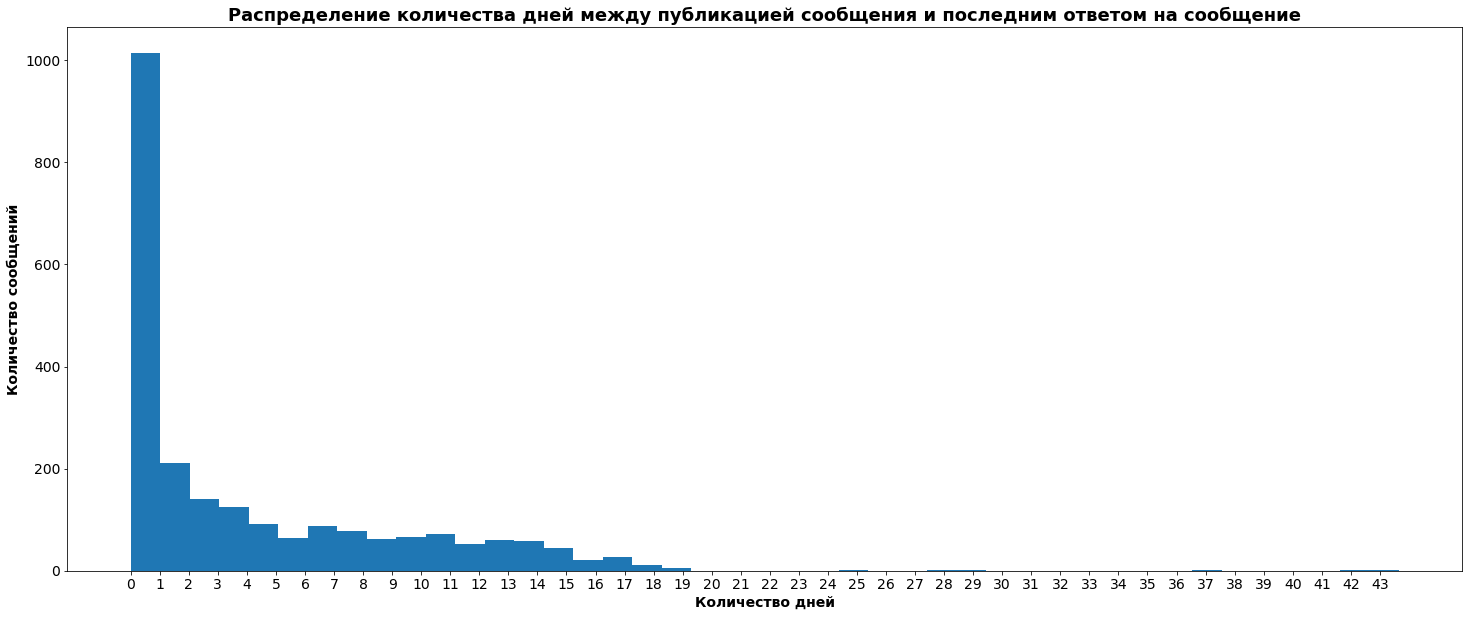

In [35]:
h1 = (dates_check['ts_latest_reply_diff'].astype('timedelta64[s]') / 86400).plot.hist(bins=43, figsize=(25, 10))
h1.set_title('Распределение количества дней между публикацией сообщения и последним ответом на сообщение',
                 fontsize=18, fontweight="bold")
h1.set_xlabel('Количество дней', fontsize=14, fontweight="bold")
h1.set_ylabel('Количество сообщений', fontsize=14, fontweight="bold")
plt.xticks(np.arange(0, 44, 1), fontsize=14)
plt.yticks(fontsize=14);

Мы видим, что бОльшая часть ответов дается на сообщения в первые два дня после публикации сообщений.

In [36]:
dates_check['ts_thread_ts'] = np.where((dates_check['ts'] >= dates_check['thread_ts']), 100, 200) # если дата треда позже сообщения, будет значение 100, если наоборот - 200 
dates_check.head()

,ts,latest_reply,thread_ts,file_date,ts_latest_reply,ts_latest_reply_diff,ts_thread_ts
0,2022-11-28 13:49:23,2022-11-28 14:24:08,2022-11-28 13:49:23,2022-11-28,100,0 days 00:34:45,100
3,2022-11-29 08:08:12,2022-11-29 10:56:57,2022-11-29 08:08:12,2022-11-29,100,0 days 02:48:45,100
7,2022-11-29 10:26:46,2022-11-29 12:08:02,2022-11-29 10:26:46,2022-11-29,100,0 days 01:41:16,100
15,2022-11-29 12:02:05,2022-11-29 13:36:28,2022-11-29 12:02:05,2022-11-29,100,0 days 01:34:23,100
20,2022-11-30 14:18:35,2022-12-01 12:54:43,2022-11-30 14:18:35,2022-11-30,100,0 days 22:36:08,100


In [37]:
dates_check['ts_latest_reply'].unique()

array([100])

Все сообщения были опубликованы позже создания тредов.

In [38]:
dates_check['ts_f_d'] = np.where((dates_check['ts'] >= dates_check['file_date']), 100, 200) # если дата треда позже сообщения, будет значение 100, если наоборот - 200 
dates_check.head()

,ts,latest_reply,thread_ts,file_date,ts_latest_reply,ts_latest_reply_diff,ts_thread_ts,ts_f_d
0,2022-11-28 13:49:23,2022-11-28 14:24:08,2022-11-28 13:49:23,2022-11-28,100,0 days 00:34:45,100,100
3,2022-11-29 08:08:12,2022-11-29 10:56:57,2022-11-29 08:08:12,2022-11-29,100,0 days 02:48:45,100,100
7,2022-11-29 10:26:46,2022-11-29 12:08:02,2022-11-29 10:26:46,2022-11-29,100,0 days 01:41:16,100,100
15,2022-11-29 12:02:05,2022-11-29 13:36:28,2022-11-29 12:02:05,2022-11-29,100,0 days 01:34:23,100,100
20,2022-11-30 14:18:35,2022-12-01 12:54:43,2022-11-30 14:18:35,2022-11-30,100,0 days 22:36:08,100,100


In [39]:
dates_check['ts_latest_reply'].unique()

array([100])

Все даты файлов не ранее даты сообщений.

In [40]:
df.query('attachments > 0').head(3)

,client_msg_id,user,ts,latest_reply,team,thread_ts,subtype,channel,file_date,attachments,reactions,text_len,text_words
197,NaN,U01QMDLG9AP,2022-12-13 14:06:04,2022-12-13 14:19:01,TPV9DP0N4,2022-12-13 14:06:04,NaN,data_edteam_info,2022-12-13,1,NaN,208,30
567,ee9d32ed-aa7e-43ad-822b-7352c84bae21,USWMKAJHW,2022-11-28 12:34:02,NaT,TPV9DP0N4,2022-11-28 07:00:57,NaN,da_53_exerciser_1,2022-11-28,1,NaN,156,10
610,b810ed66-92bd-43c3-b8bb-ffca4b3e9b2a,USWMKAJHW,2022-12-07 04:52:17,NaT,TPV9DP0N4,2022-11-28 07:00:59,NaN,da_53_exerciser_1,2022-12-06,2,"[{'name': 'heavy_check_mark', 'users': ['U034A...",1197,139


 - **Изучение данных в столбцах, содержащих информацию о размерах сообщений:\
 text_len,\
 text_words**

In [41]:
df['text_len'].describe()

count    26533.000000
mean       155.156484
std        242.823825
min          0.000000
25%         37.000000
50%         80.000000
75%        178.000000
max      10933.000000
Name: text_len, dtype: float64

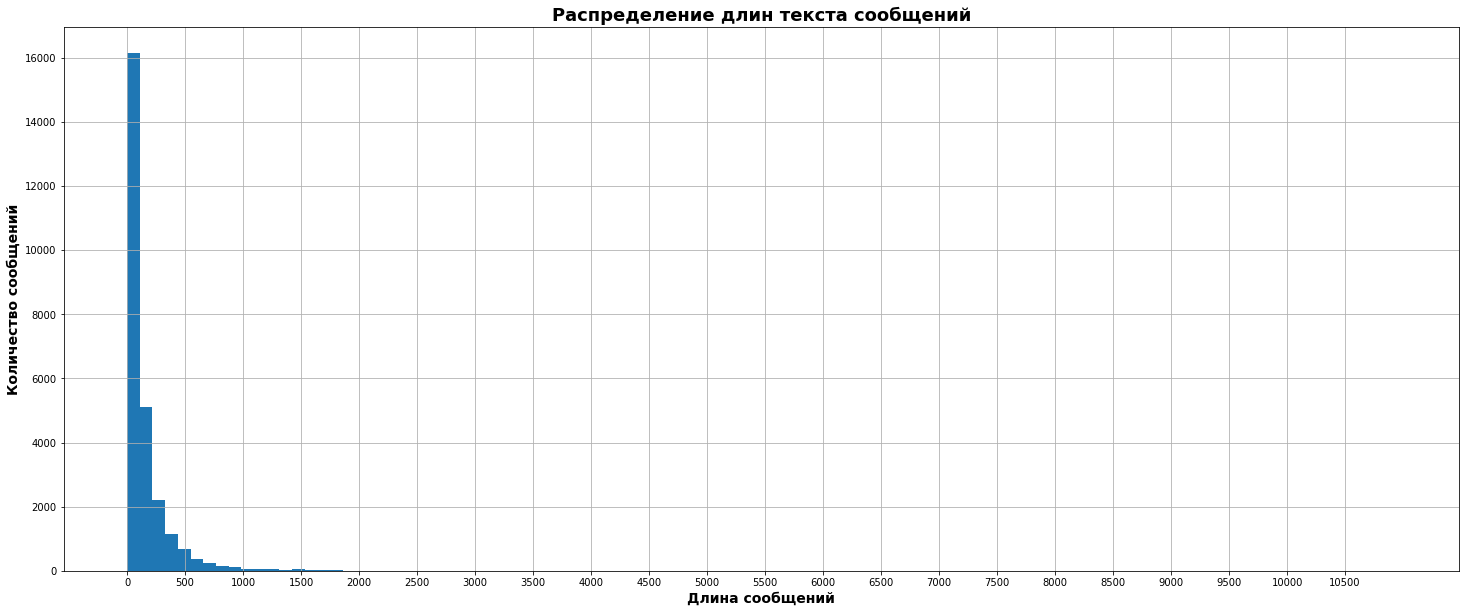

In [42]:
h2 = df['text_len'].hist(bins=100, figsize=(25, 10)) # гистограмма по длинам всех сообщений
h2.set_title('Распределение длин текста сообщений', fontsize=18, fontweight="bold")
h2.set_xlabel('Длина сообщений', fontsize=14, fontweight="bold")
h2.set_ylabel('Количество сообщений', fontsize=14, fontweight="bold")
plt.xticks(np.arange(0, 11000, 500));

Мы видим, что весьма незначительное количество сообщений являются аномально длинными, то есть имеют длину в несколько тысяч символов. Это может объясняться тем, что некоторые сообщения являются длинными объявлениями, например, от кураторов когорт.\
При дальнейшем анализе при необходимости нужно отсекать аномально длинные сообщения.

Для большей наглядности распределения длин сообщений мы построили гистограмму с ограничением количества символов до 1000.

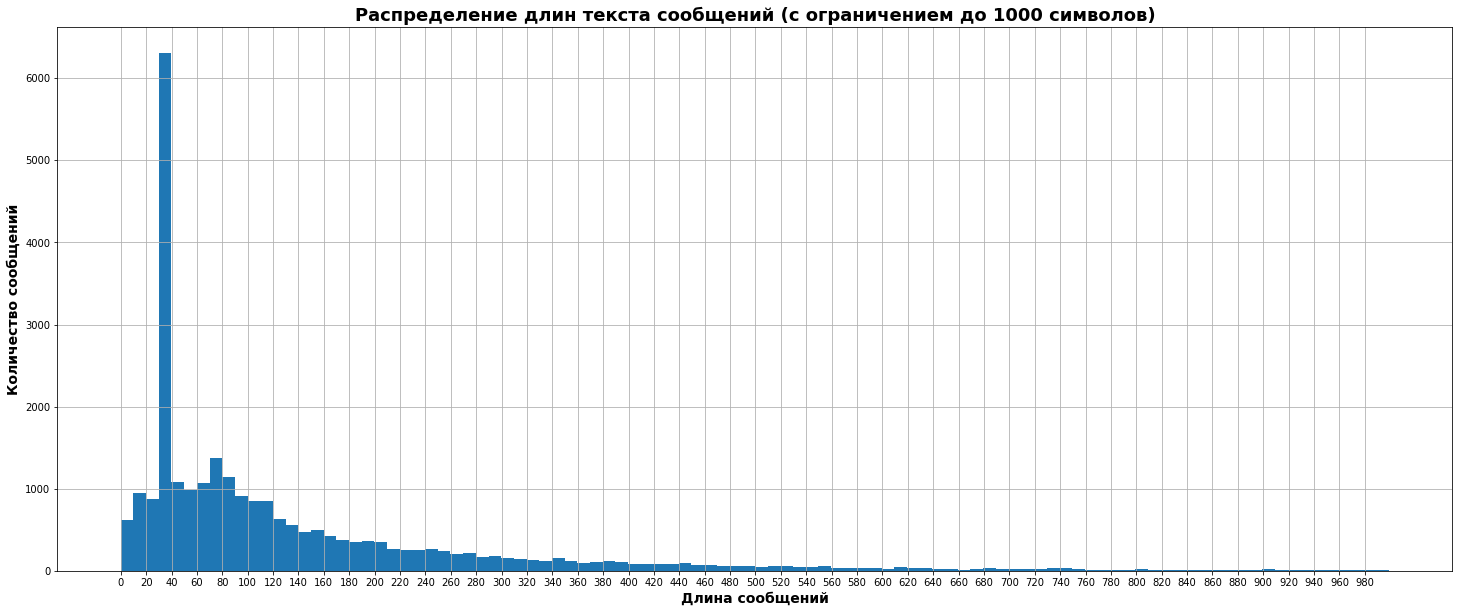

In [43]:
h3 = df[df['text_len']<=1000]['text_len'].hist(bins=100, figsize=(25, 10)) # Для наглядности ограничили длину сообщения до 1000 знаков
h3.set_title('Распределение длин текста сообщений (c ограничением до 1000 символов)', fontsize=18, fontweight="bold")
h3.set_xlabel('Длина сообщений', fontsize=14, fontweight="bold")
h3.set_ylabel('Количество сообщений', fontsize=14, fontweight="bold")
plt.xticks(np.arange(0, 1000, 20));

Мы видим, что наиболее распространенная величина сообщений - около 40 символов.\
50% сообщений имеют длину в 80 символов, 75% сообщений имеют длину 178 символов.

In [44]:
df['text_words'].describe()

count    26533.000000
mean        20.740813
std         30.822556
min          0.000000
25%          5.000000
50%         11.000000
75%         24.000000
max        989.000000
Name: text_words, dtype: float64

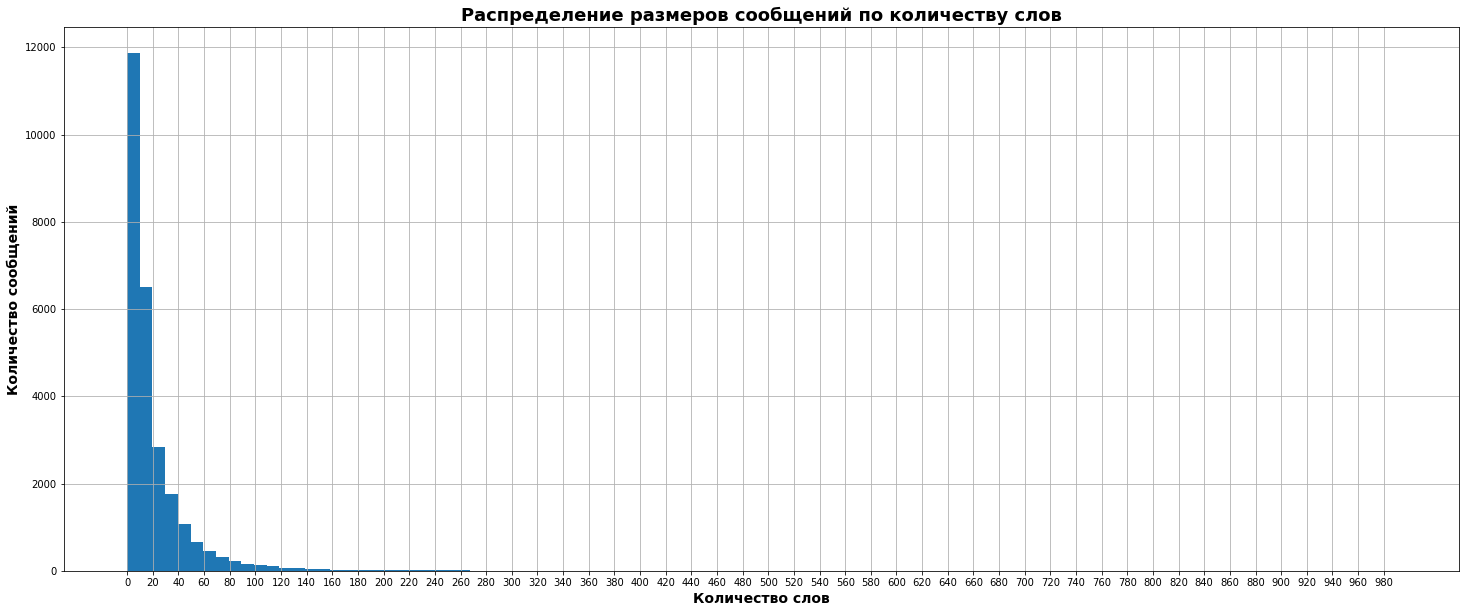

In [45]:
h4 = df['text_words'].hist(bins=100, figsize=(25, 10)) # гистограмма по количеству слов всех сообщений
h4.set_title('Распределение размеров сообщений по количеству слов', fontsize=18, fontweight="bold")
h4.set_xlabel('Количество слов', fontsize=14, fontweight="bold")
h4.set_ylabel('Количество сообщений', fontsize=14, fontweight="bold")
plt.xticks(np.arange(0, 1000, 20));

Мы видим, что весьма незначительное количество сообщений являются аномально большими, то есть имеют количество слов более 100. Это также, каки и аномально большое количество символов в сообщениях, может объясняться тем, что некоторые сообщения являются длинными объявлениями, например, от кураторов когорт.\
При дальнейшем анализе при необходимости нужно отсекать аномально большие сообщения.

Для большей наглядности распределения размеров сообщений мы построили гистограмму с ограничением количества слов до 100.

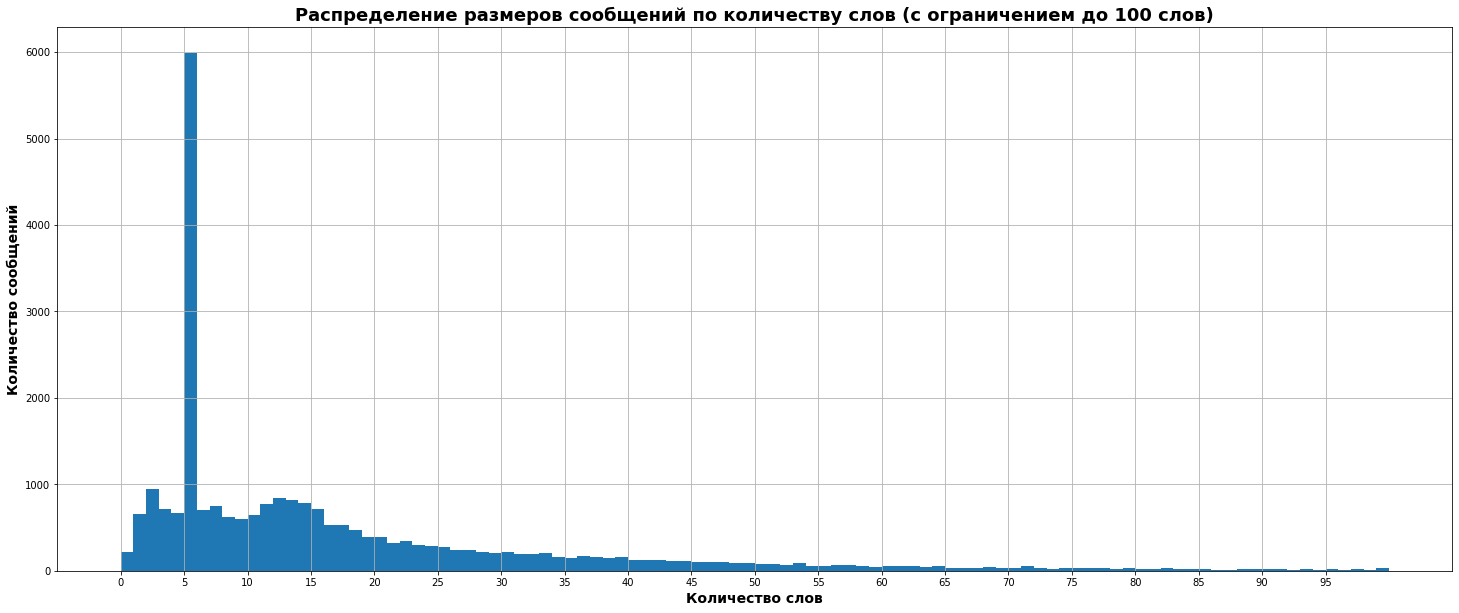

In [46]:
h5 = df[df['text_words']<=100]['text_words'].hist(bins=100, figsize=(25, 10)) # Для наглядности ограничили количество слов в сообщениях до 100
h5.set_title('Распределение размеров сообщений по количеству слов (c ограничением до 100 слов)', fontsize=18, fontweight="bold")
h5.set_xlabel('Количество слов', fontsize=14, fontweight="bold")
h5.set_ylabel('Количество сообщений', fontsize=14, fontweight="bold")
plt.xticks(np.arange(0, 100, 5));

Мы видим, что наиболее распространенный размер сообщений - 6 слов.\
50% сообщений имеют 6 слов, 75% сообщений имеют 24 слова.

 <a id="third_6"></a> 
### Добавление новых столбцов - распределение данных по категориям

В целях проведения исследования мы добавили следующие столбцы:

 - **course - основное направление канала в мессенджере**:

При просмотре уникальных значений каналов в разделе 3.4.3 проекта мы заметили, что наименования каналов начинаются с обозначения курса обучения, что мы принимаем как основное направление канала.

In [47]:
df['course'] = df['channel']

In [48]:
pd.set_option('mode.chained_assignment', None)

In [49]:
def cutter_1(a):
    for i in range(len(a)):
        a[i] = a[i].partition('_')[0]
    
cutter_1(df['course'])

In [50]:
df['course'].unique()

array(['data-analysts-bus', 'datatracker', 'data', 'da', 'de-pro1',
       'de-pro2', 'de-pro3', 'de-pro4', 'de-project', 'design', 'de',
       'dl', 'donorsearch', 'ds', 'masterskaya', 'sql'], dtype=object)

Мы добавили столбец course, в котором содержатся наименования направлений обучения, которые соответствуют основным направлениям каналов.

 - **theme - тематика сообщений в каналах**:

При просмотре уникальных значений каналов в разделе 3.4.3 проекта мы также заметили, что наименования каналов содержат общие тематики для большинства курсов, которые мы выделили в столбце theme.

In [51]:
df['theme'] = df['channel']

In [52]:
def cutter_3(a):
    for i in range(len(a)):
        if a[i].__contains__('library'):
            a[i] = 'library'
        else:
            if a[i].__contains__('projects'):
                a[i] = 'projects'
            else: 
                if a[i].__contains__('exerciser'):
                    a[i] = 'exerciser'
                else:
                    if a[i].__contains__('teamwork'):
                        a[i] = 'teamwork'
                    else:
                        if a[i].__contains__('info'):
                            a[i] = 'info'
                        else:
                            a[i] = 'other'

In [53]:
cutter_3(df['theme'])
df['theme'].unique()

array(['other', 'info', 'exerciser', 'projects', 'library', 'teamwork'],
      dtype=object)

In [54]:
oth_q =df[df['theme'] == 'other']['theme'].count()
oth_p = oth_q/df['theme'].count()

In [55]:
print('Количество каналов с тематикой other составляет:', oth_q, ', или', round((oth_p)*100, 1), '%')

Количество каналов с тематикой other составляет: 3190 , или 12.0 %


 - **ts_hour - час дня публикации сообщения**:

In [56]:
df['ts_hour'] = pd.DatetimeIndex(df['ts']).hour #выделяем числовое обозначения часа дня
df['ts_hour'].unique()

array([13, 14,  8, 10, 11, 12, 18,  9, 15, 16, 17,  6,  3,  5,  7, 20, 22,
       19, 21, 23,  2,  4,  1,  0])

Столбец ts_hour содержит числовое обозначение часа дня публикации сообщения от 0 до 23.

 - **day_time - время дня публикации сообщения**:

In [57]:
df['day_time'] = df['ts_hour']

In [58]:
def cutter_4(a):
    for i in range(len(a)):
        if a[i] >= 6 and a[i]<10:
            a[i] = 'утро'
        else:
            if a[i] >= 10 and a[i]<14:
                a[i] = 'с утра до обеда'
            else: 
                if a[i] >= 14 and a[i]<18:
                    a[i] = 'с обеда до вечера'
                else:
                    if a[i] >= 18 and a[i]<23:
                        a[i] = 'вечер'
                    else:
                        if a[i] >= 23 or a[i]<6:
                            a[i] = 'ночь'
                        else:
                            a[i] = 'other'

In [59]:
cutter_4(df['day_time'])
df['day_time'].unique()

array(['с утра до обеда', 'с обеда до вечера', 'утро', 'вечер', 'ночь'],
      dtype=object)

Столбец day_time содержит текстовое обозначение времени дня публикации сообщения.

 - **day_time - день публикации сообщения**:

In [60]:
df['ts_day'] = pd.DatetimeIndex(df['ts']).day
df['ts_day'].unique()

array([28, 29, 30,  1,  2,  3,  5,  6,  7,  9, 12, 13, 14, 16,  4, 10, 11,
       25,  8, 15, 21, 19, 27, 17, 22, 23, 26, 24, 31, 20, 18])

Столбец ts_day содержит числовое обозначение дня публикации сообщения от 1 до 31.

 - **ts_month - месяц публикации сообщения**:

In [61]:
df['ts_month'] = pd.DatetimeIndex(df['ts']).month
df['ts_month'].unique()

array([11, 12, 10,  1,  2])

Столбец ts_month содержит числовое обозначение месяца публикации сообщения от 10 до 2, то есть с октября по февраль.

Данные в столбце ts_month ограничены пятью месяцами, но их выделение все равно имеет значение для исследования, так как можно проанализировать активность пользователей мессенджера в государственные праздники, например, в новогодние и 23 февраля.

In [62]:
ts_month_bar = df.groupby('ts_month')['ts_month'].count()
ts_month_bar

ts_month
1        14
2        10
10        7
11     8180
12    18322
Name: ts_month, dtype: int64

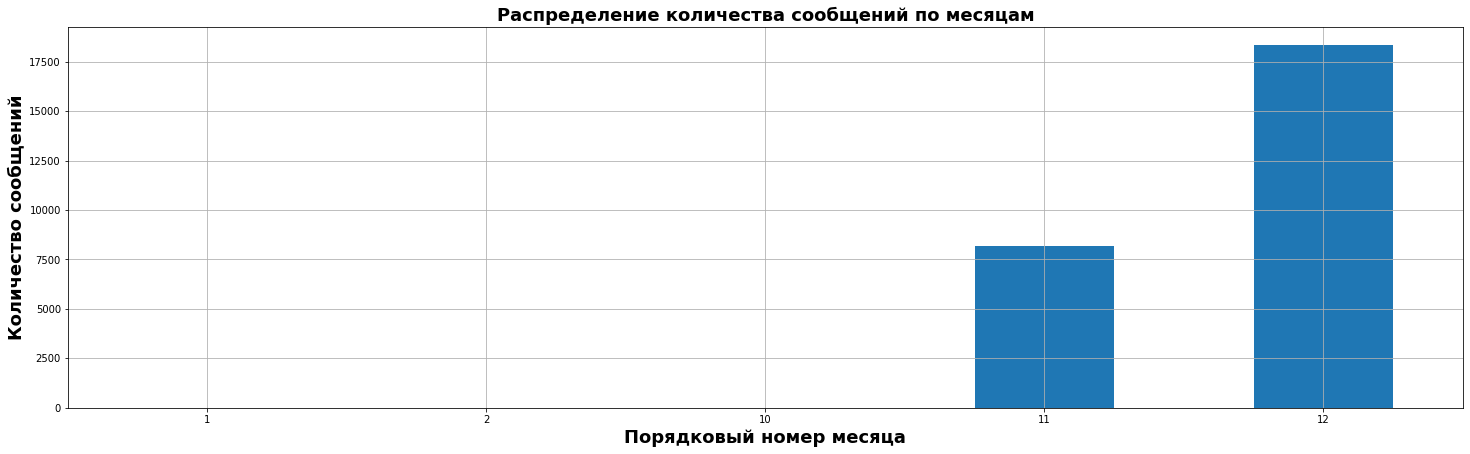

In [63]:
ts_month_fig = ts_month_bar.plot(kind = 'bar', grid = True, figsize=(25, 7))
ts_month_fig.set_ylabel('Количество сообщений', fontsize=18, fontweight="bold")
ts_month_fig.set_xlabel('Порядковый номер месяца', fontsize=18, fontweight="bold")
ts_month_fig.set_title('Распределение количества сообщений по месяцам', fontsize=18, fontweight="bold")
plt.xticks(rotation = 0);

Мы видим, что основная часть сообщений в датасете приходится на два месяца: ноябрь и декабрь.

In [64]:
m_c = (df[df['ts_month'] >=11]['ts_month'].count() / df['ts_month'].count() *100).round(2)
print('На два месяца - ноябрь и декабрь, приходится', m_c, '% сообщений в датасете'  )

На два месяца - ноябрь и декабрь, приходится 99.88 % сообщений в датасете


 - **total_reactions - количество реакций**:

In [65]:
def react(reactions):
    x = 0
    if reactions !=0:
        if (type(reactions)==str):
            reactions = ast.literal_eval(reactions)
            for item in reactions:
                x = sum(item['count'] for item in reactions)
        else: 
            x = 0 
    return x

In [66]:
df['all_reactions'] = df['reactions'].apply(react)

In [67]:
df[df['all_reactions']>0]['all_reactions'].count

<bound method Series.count of 1        1
3        1
7        5
9        1
14       1
        ..
26480    1
26486    7
26494    1
26518    1
26524    1
Name: all_reactions, Length: 4169, dtype: int64>

In [68]:
df['all_reactions'].describe()

count    26533.000000
mean         0.420608
std          2.912863
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        180.000000
Name: all_reactions, dtype: float64

Мы посчитали количество реакций на сообщения.\
БОльшая часть сообщений не имеет реакций.

In [69]:
df[df['all_reactions'] != 0]['all_reactions'].describe()

count    4169.000000
mean        2.676901
std         6.926017
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       180.000000
Name: all_reactions, dtype: float64

Среди сообщений, которые имеют реакции, бОльшая часть сообщений имеет от 1 до 2 реакций.

 - **len_group - распределение сообщений по группам в зависимости от длины сообщений**:

In [70]:
df['len_group'] = df['text_len']

In [71]:
def cutter_5(a):
    for i in range(len(a)):
        if a[i] >= 0 and a[i]<100:
            a[i] = 'от 0 до 100 символов'
        else:
            if a[i] >= 100 and a[i]<200:
                a[i] = 'от 100 до 200 символов'
            else: 
                if a[i] >= 200 and a[i]<500:
                    a[i] = 'от 200 до 500 символов'
                else:
                    if a[i] >= 500 and a[i]<1000:
                        a[i] = 'от 500 до 1000 символов'
                    else:
                        if a[i] >= 1000 and a[i]<=2000:
                            a[i] = 'от 1000 до 2000 символов'
                        else:
                            a[i] = 'более 2000 символов'

In [72]:
cutter_5(df['len_group'])
df['len_group'].unique()

array(['от 200 до 500 символов', 'от 0 до 100 символов',
       'от 100 до 200 символов', 'от 500 до 1000 символов',
       'от 1000 до 2000 символов', 'более 2000 символов'], dtype=object)

Мы сгруппировали сообщения на группы по количеству символов, учитывая данные по распределению сообщений по длине текста в п.3.5 настоящего проекта.

 - **words_group - распределение сообщений по группам в зависимости от количества слов в сообщениях**:

In [73]:
df['words_group'] = df['text_words']

In [74]:
def cutter_6(a):
    for i in range(len(a)):
        if a[i] >= 0 and a[i]<10:
            a[i] = 'от 0 до 10 слов'
        else:
            if a[i] >= 10 and a[i]<20:
                a[i] = 'от 10 до 20 слов'
            else: 
                if a[i] >= 20 and a[i]<50:
                    a[i] = 'от 20 до 50 слов'
                else:
                    if a[i] >= 50 and a[i]<100:
                        a[i] = 'от 50 до 100 слов'
                    else:
                        if a[i] >= 100 and a[i]<=200:
                            a[i] = 'от 100 до 200 слов'
                        else:
                            a[i] = 'более 200 символов'

In [75]:
cutter_6(df['words_group'])
df['words_group'].unique()

array(['от 20 до 50 слов', 'от 50 до 100 слов', 'от 0 до 10 слов',
       'от 10 до 20 слов', 'от 100 до 200 слов', 'более 200 символов'],
      dtype=object)

Мы сгруппировали сообщения на группы по количеству слов, учитывая данные по распределению сообщений по количеству слов в п.3.5 настоящего проекта.

 <a id="fourth"></a> 
## Исследовательский анализ данных

Мы проанализировали активность обратной связи на сообщения через количество реакций на сообщения в различных разрезах тематик, периодов публикаций и длины текста сообщений.

В разделе 3.6 настоящего проекта мы установили, что 99.88% сообщений в датасете приходится на два месяца: ноябрь и декабрь.\
Также мы проверили, на какие месяцы приходятся реакции к сообщениям.

In [76]:
df_wr = df[df['reactions'].isna()==False].groupby('ts_month')['reactions'].count()
df_wr

ts_month
11    1178
12    2991
Name: reactions, dtype: int64

Мы видим, что все реакции к сообщениям приходятся на два месяца - ноябрь и декабрь. Поэтому и с учетом, что 99.88% сообщений также приходятся на эти два месяца, для анализа количества реакций к сообщениям мы создали рабочий датасет df_wr_mn, который содержит данные только ноября и декабря.

In [77]:
df_wr_mn = df[df['ts_month']>=11] # создаем рабочий датасет, который содержит данные только ноября и декабря
df_wr_mn['ts_month'].unique()

array([11, 12])

 <a id="fourth_1"></a> 
### Изучение зависимости длины сообщений и активности обратной связи на сообщения

В целях изучения зависимости длины сообщений и активности обратной связи на сообщения мы сделали анализ по двум направлениям: зависимость активности обратной связи от длины текста сообщений (в символах) и зависимость активности обратной связи от количества слов в сообщении.

#### Изучение зависимости длины текста сообщений и активности обратной связи на сообщения

In [78]:
df_wr_mn['all_reactions'].corr(df['text_len']).round(2) # коэффициент корреляции общего количества реакций к сообщению и длины текста сообщения

0.17

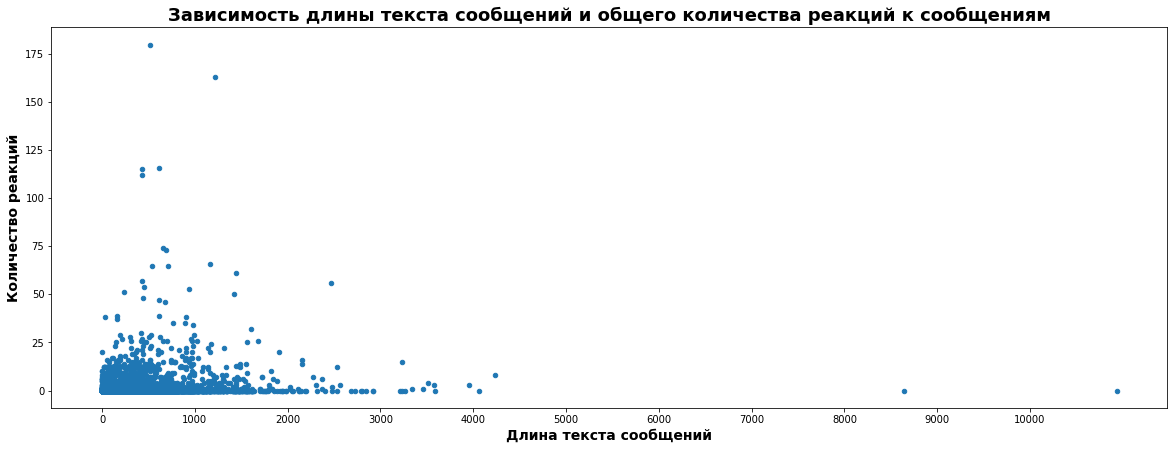

In [79]:
fig1 = df_wr_mn.plot(x='text_len', y='all_reactions', kind='scatter', figsize=(20, 7))
fig1.set_title('Зависимость длины текста сообщений и общего количества реакций к сообщениям', fontsize=18, fontweight="bold")
fig1.set_xlabel('Длина текста сообщений', fontsize=14, fontweight="bold")
fig1.set_ylabel('Количество реакций', fontsize=14, fontweight="bold")
plt.xticks(np.arange(0, 11000, 1000));

Длина текста сообщений и количества реакций к сообщениям имеют довольно низкий коэффициент корреляции - 0.17, то есть они практически не зависят друг от друга.\
При этом диаграмма рассения показывает нам, что наибольшее количество реакций имеют сообщения с количеством символов около 1000, поэтому для проверки влияния длины сообщения на количество реакций мы далее построили сводную таблицу со средним количеством реакций для разных групп сообщений в зависимости от их длины.

In [80]:
group_len_react = df_wr_mn.pivot_table(index='len_group', values=['all_reactions'], aggfunc='mean').round(1) #сводная таблица со средним количеством реакций для разных групп сообщений в зависимости от их длины
display(group_len_react.sort_values(by='all_reactions', ascending=False))

,all_reactions
len_group,
более 2000 символов,3.5
от 1000 до 2000 символов,3.3
от 500 до 1000 символов,2.3
от 200 до 500 символов,0.7
от 100 до 200 символов,0.4
от 0 до 100 символов,0.2


На основании построенной сводной мы видим интересную зависимость, что чем длиннее сообщение, тем большее количество реакций оно имеет. С учетом низкого коэффициента корреляции длины текста сообщений и количества реакций мы сделаем следующую рекомендацию:\
 **- для повышения активности обратной связи на сообщения не стоит сокращать их длину в ущерб содержанию; длинный текст не является фактором, который снижает обратную связь на сообщение.**

#### Изучение зависимости количества слов в сообщениях и активности обратной связи на сообщения

In [81]:
df_wr_mn['all_reactions'].corr(df['text_words']).round(2) # коэффициент корреляции общего количества реакций к сообщению и количества слов в сообщении

0.19

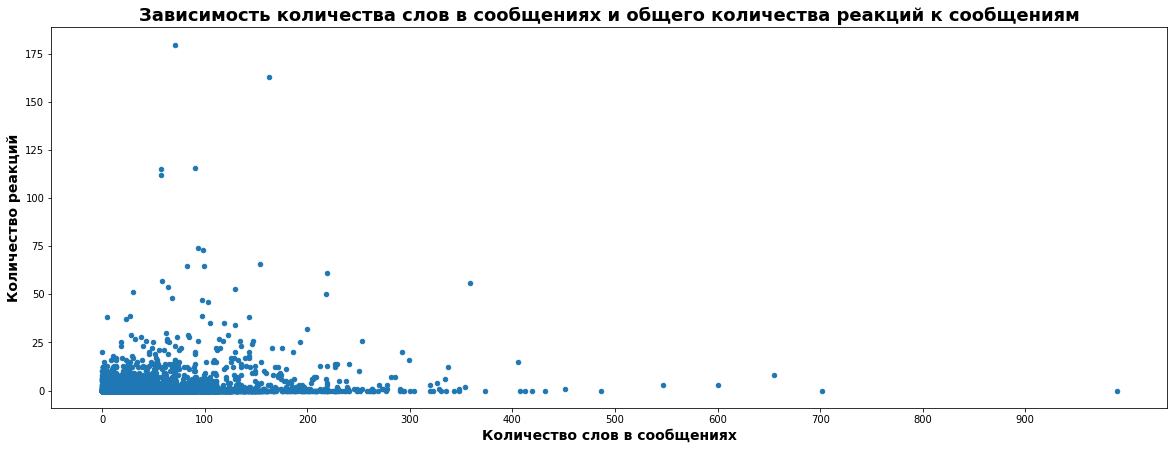

In [82]:
fig2 = df_wr_mn.plot(x='text_words', y='all_reactions', kind='scatter', figsize=(20, 7))
fig2.set_title('Зависимость количества слов в сообщениях и общего количества реакций к сообщениям', fontsize=18, fontweight="bold")
fig2.set_xlabel('Количество слов в сообщениях', fontsize=14, fontweight="bold")
fig2.set_ylabel('Количество реакций', fontsize=14, fontweight="bold")
plt.xticks(np.arange(0, 1000, 100));

In [83]:
group_words_react = df_wr_mn.pivot_table(index='words_group', values=['all_reactions'], aggfunc='mean').round(1) #сводная таблица со средним количеством реакций для разных групп сообщений в зависимости от их длины
display(group_words_react.sort_values(by='all_reactions', ascending=False))

,all_reactions
words_group,
более 200 символов,3.8
от 100 до 200 слов,3.1
от 50 до 100 слов,1.6
от 20 до 50 слов,0.5
от 0 до 10 слов,0.2
от 10 до 20 слов,0.2


На основании построенной сводной мы видим интересную зависимость, что чем больше слов в сообщении, тем большее количество реакций оно имеет. С учетом низкого коэффициента корреляции количества слов в сообщениях и количества реакций мы сделаем следующую рекомендацию:\
 **- для повышения активности обратной связи на сообщения не стоит сокращать количество слов в сообщениях в ущерб содержанию; длинный текст не является фактором, который снижает обратную связь на сообщение.**

Рекомендации сделанные на основа анализа зависимости длины сообщения и количества реакций и зависимости количества слов в сообщении и количества реакций ожидаемо одинаковые.

 <a id="fourth_2"></a> 
### Изучение зависимости времени дня публикации сообщения и активности обратной связи на сообщения

In [84]:
group_day_time = df_wr_mn.pivot_table(index='day_time', values=['all_reactions'], aggfunc='sum') #сводная таблица с общим количеством реакций для разных направлений обучения

In [85]:
group_day_time = group_day_time.reindex(['утро','с утра до обеда','с обеда до вечера','вечер','ночь'])

In [86]:
group_day_time.columns = ['Общее количество реакций']
group_day_time

,Общее количество реакций
day_time,
утро,3416
с утра до обеда,3630
с обеда до вечера,2547
вечер,1191
ночь,376


In [87]:
group_day_time_mes = df_wr_mn.pivot_table(index='day_time', values=['ts'], aggfunc='count')

In [88]:
group_day_time_mes = group_day_time_mes.reindex(['утро','с утра до обеда','с обеда до вечера','вечер','ночь'])

In [89]:
group_day_time_mes.columns = ['Общее количество сообщений']
group_day_time_mes

,Общее количество сообщений
day_time,
утро,8139
с утра до обеда,7243
с обеда до вечера,6722
вечер,3536
ночь,862


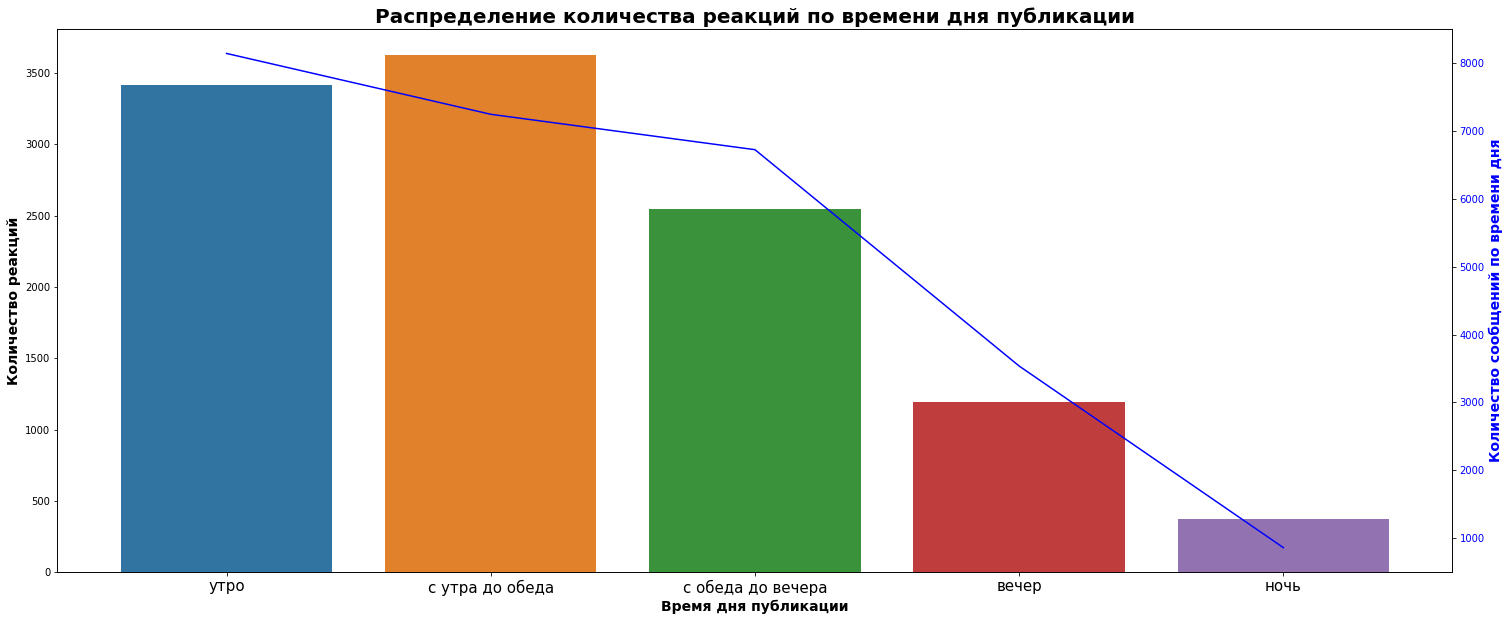

In [90]:
ax3 = plt.subplots(figsize=(25, 10))
ax3 = sns.barplot(y=group_day_time['Общее количество реакций'], x=group_day_time.index)
ax3.set_title('Распределение количества реакций по времени дня публикации', fontsize=20, fontweight="bold")
ax3.set_xlabel('Время дня публикации', fontsize=14, fontweight="bold")
ax3.set_ylabel('Количество реакций', fontsize=14, fontweight="bold")
plt.xticks(fontsize = 15)
ax31 = ax3.twinx() 
ax31.set_ylabel('Количество сообщений по времени дня', color = 'blue', fontsize=14, fontweight="bold") 
ax31.plot(group_day_time_mes, color = 'blue') 
ax31.tick_params(axis ='y', labelcolor = 'blue');

Мы посмотрели общее количество реакций по времени дня публикации сообщений: реакции есть для всех временных отрезков дня.\
Для определения оптимального времени дня публикации сообщений с целью повысить обратную связь, мы рассчитали среднее количество реакций для разных периодов дня.

In [91]:
group_day_time_mean = df_wr_mn.pivot_table(index='day_time', values=['all_reactions'], aggfunc='mean').round(2).sort_values(by='all_reactions', ascending=False) #сводная таблица с средним количеством реакций для разных направлений обучения
group_day_time_mean.columns = ['Среднее количество реакций']
display(group_day_time_mean.sort_values(by='Среднее количество реакций', ascending=False).T)

day_time,с утра до обеда,ночь,утро,с обеда до вечера,вечер
Среднее количество реакций,0.5,0.44,0.42,0.38,0.34


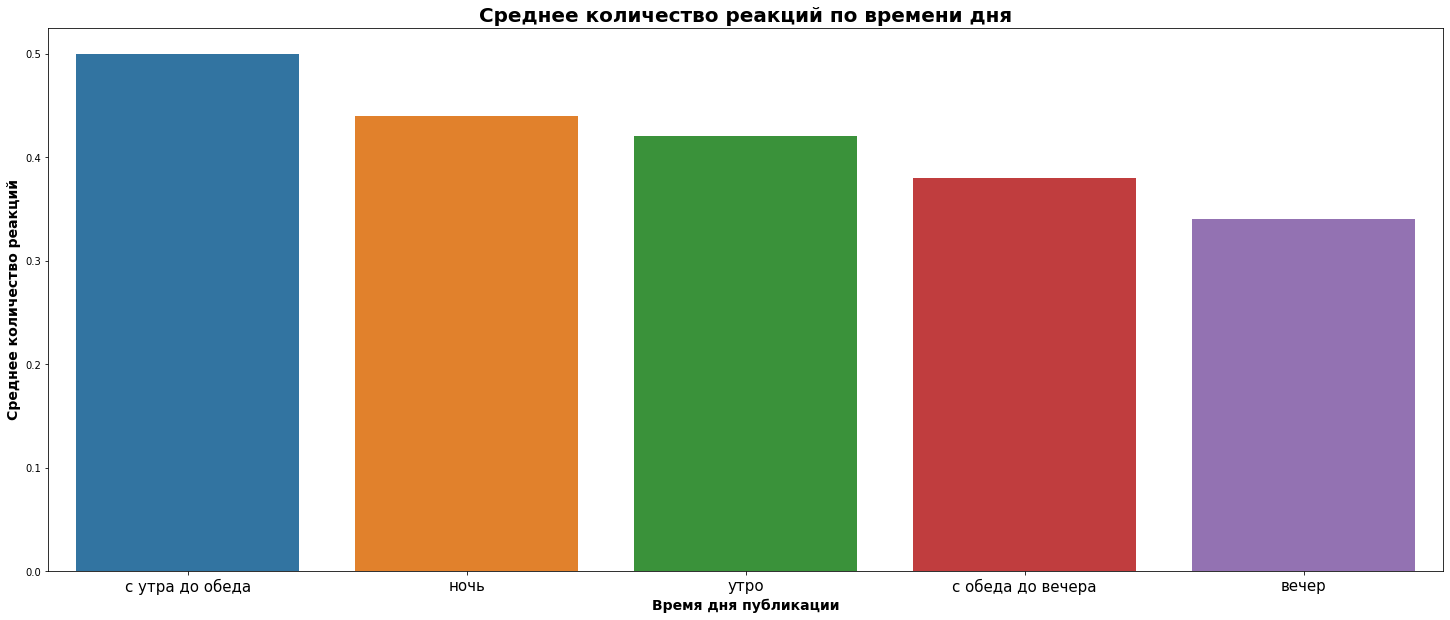

In [92]:
ax4 = plt.subplots(figsize=(25, 10))
ax4 = sns.barplot(y=group_day_time_mean['Среднее количество реакций'], x=group_day_time_mean.index)
ax4.set_title('Среднее количество реакций по времени дня', fontsize=20, fontweight="bold")
ax4.set_xlabel('Время дня публикации', fontsize=14, fontweight="bold")
ax4.set_ylabel('Среднее количество реакций', fontsize=14, fontweight="bold")
plt.xticks(fontsize = 15);

На основании анализа среднего количества реакций на сообщения, опубликованные в разное время дня, можно дать следующую рекомендацию:\
 **- для повышения активности обратной связи сообщения стоит публиковать в начале дня - с утра до обеда.**

 <a id="fourth_3"></a> 
### Изучение зависимости канала публикации сообщения и активности обратной связи на сообщения

In [93]:
group_course = df_wr_mn.pivot_table(index='course', values=['all_reactions'], aggfunc='sum').sort_values(by='all_reactions', ascending=False) #сводная таблица с общим количеством реакций для разных направлений обучения
group_course.columns = ['Общее количество реакций']
display(group_course.sort_values(by='Общее количество реакций', ascending=False).T)

course,da,ds,de,dl,data,sql,data-analysts-bus,masterskaya,datatracker,de-pro1,de-pro2,de-pro3,de-pro4,de-project,design,donorsearch
Общее количество реакций,5832,3016,1267,724,140,64,62,55,0,0,0,0,0,0,0,0


In [94]:
group_course_mes = df_wr_mn.pivot_table(index='course', values=['ts'], aggfunc='count').sort_values(by='ts', ascending=False) #сводная таблица с общим количеством сообщений для разных направлений обучения
group_course_mes.columns = ['Общее количество сообщений']
display(group_course_mes.sort_values(by='Общее количество сообщений', ascending=False).T)

course,da,ds,de,dl,sql,data,data-analysts-bus,masterskaya,design,datatracker,de-pro1,de-pro2,de-pro3,de-pro4,de-project,donorsearch
Общее количество сообщений,12912,9815,1976,1325,189,109,97,70,2,1,1,1,1,1,1,1


Изучив уникальные наименования каналов мы видим, что наименования каналов публикаций сообщений отражают направления обучения.

Мы посмотрели общее количество реакций по направлениям обучения: реакции есть только для направлений da, ds, de, dl, data, sql, data-analysts-bus и masterskaya.\
Для направлений de-pro, de-project, design, donorsearch реакций нет, но для этих каналов в датасете содержится миниальное количество сообщений. Для дальнейшего анализа количества реакций по направлениям обучения мы далее создали еще один рабочий датасет df_wr_mn_2, в котором исключим направления обучения со слишком низким количеством сообщений.

In [95]:
MyList = ['de-pro1', 'de-pro2', 'de-pro3', 'de-pro4', 'de-project', 'design', 'datatracker', 'donorsearch']

In [96]:
df_wr_mn_2 = df_wr_mn[df_wr_mn['course'].isin(MyList) == False]

In [97]:
df_wr_mn_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26493 entries, 0 to 26530
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   client_msg_id  18259 non-null  object        
 1   user           23607 non-null  object        
 2   ts             26493 non-null  datetime64[ns]
 3   latest_reply   2298 non-null   datetime64[ns]
 4   team           15854 non-null  object        
 5   thread_ts      18215 non-null  datetime64[ns]
 6   subtype        8280 non-null   object        
 7   channel        26493 non-null  object        
 8   file_date      26493 non-null  datetime64[ns]
 9   attachments    26493 non-null  int64         
 10  reactions      4169 non-null   object        
 11  text_len       26493 non-null  int64         
 12  text_words     26493 non-null  int64         
 13  course         26493 non-null  object        
 14  theme          26493 non-null  object        
 15  ts_hour        2649

In [98]:
group_course_mes_2 = df_wr_mn_2.pivot_table(index='course', values=['ts'], aggfunc='count').sort_values(by='ts', ascending=False) #сводная таблица с общим количеством сообщений для разных направлений обучения с приемлемым для анализа количеством сообщений
group_course_mes_2.columns = ['Общее количество сообщений']
display(group_course_mes_2.sort_values(by='Общее количество сообщений', ascending=False).T)  

course,da,ds,de,dl,sql,data,data-analysts-bus,masterskaya
Общее количество сообщений,12912,9815,1976,1325,189,109,97,70


In [99]:
group_course_mes_2 = group_course_mes_2.reindex(['data','masterskaya','data-analysts-bus','de','dl', 'da','sql','ds'])

Для направлений обучения, для которых датасет содержит приемлемое количество сообщений, мы рассчитали среднее количество реакций на сообщение.

In [100]:
group_course_mean = df_wr_mn_2.pivot_table(index='course', values=['all_reactions'], aggfunc='mean').round(2).sort_values(by='all_reactions', ascending=False) #сводная таблица с средним количеством реакций для разных направлений обучения
group_course_mean.columns = ['Среднее количество реакций']
display(group_course_mean.sort_values(by='Среднее количество реакций', ascending=False).T)

course,data,masterskaya,data-analysts-bus,de,dl,da,sql,ds
Среднее количество реакций,1.28,0.79,0.64,0.64,0.55,0.45,0.34,0.31


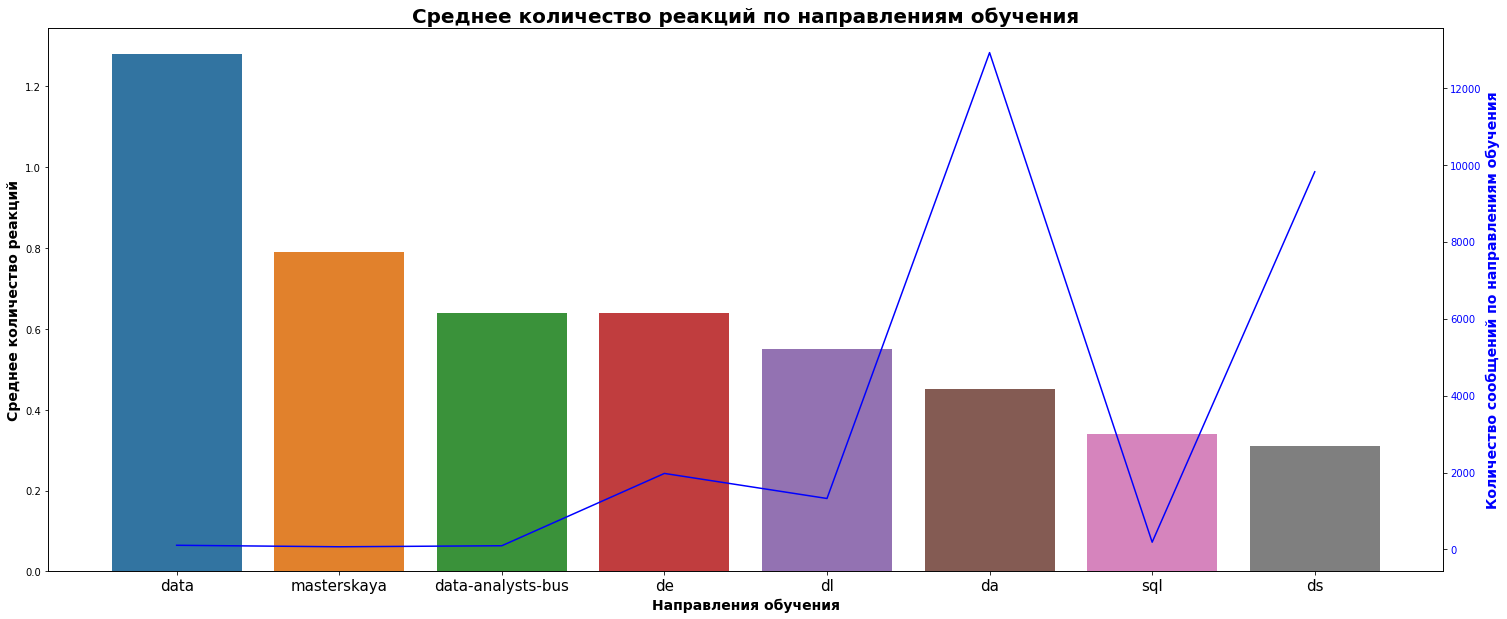

In [101]:
ax2 = plt.subplots(figsize=(25, 10))
ax2 = sns.barplot(y=group_course_mean['Среднее количество реакций'], x=group_course_mean.index)
ax2.set_title('Среднее количество реакций по направлениям обучения', fontsize=20, fontweight="bold")
ax2.set_xlabel('Направления обучения', fontsize=14, fontweight="bold")
ax2.set_ylabel('Среднее количество реакций', fontsize=14, fontweight="bold")
plt.xticks(fontsize = 15)
ax21 = ax2.twinx() 
ax21.set_ylabel('Количество сообщений по направлениям обучения', color = 'blue', fontsize=14, fontweight="bold") 
ax21.plot(group_course_mes_2, color = 'blue') 
ax21.tick_params(axis ='y', labelcolor = 'blue');

Мы видим, что среднее количество реакций на сообщения отличается в зависимости от направления обучения, по которому было опубликовано сообщение. Соответственно, курс обучения является существенным фактором, определяющим активность обратной связи на сообщения.

 <a id="fourth_4"></a> 
### Изучение зависимости тематики публикации сообщения и активности обратной связи на сообщения

In [102]:
group_theme = df_wr_mn.pivot_table(index='theme', values=['all_reactions'], aggfunc='sum').sort_values(by='all_reactions', ascending=False) #сводная таблица с общим количеством реакций для разных тематик обучения
group_theme.columns = ['Общее количество реакций']
display(group_theme.sort_values(by='Общее количество реакций', ascending=False).T)

theme,info,teamwork,other,exerciser,projects,library
Общее количество реакций,5054,2133,1397,1266,1146,164


In [103]:
group_theme_mes = df_wr_mn.pivot_table(index='theme', values=['ts'], aggfunc='count') #сводная таблица с общим количеством сообщений разных тематик
group_theme_mes.columns = ['Общее количество сообщений']
display(group_theme_mes.sort_values(by='Общее количество сообщений', ascending=False).T)

theme,projects,exerciser,teamwork,info,other,library
Общее количество сообщений,7331,6830,4278,3855,3189,1019


In [104]:
group_theme_mes = group_theme_mes.reindex(['info', 'teamwork', 'other', 'exerciser', 'projects', 'library'])

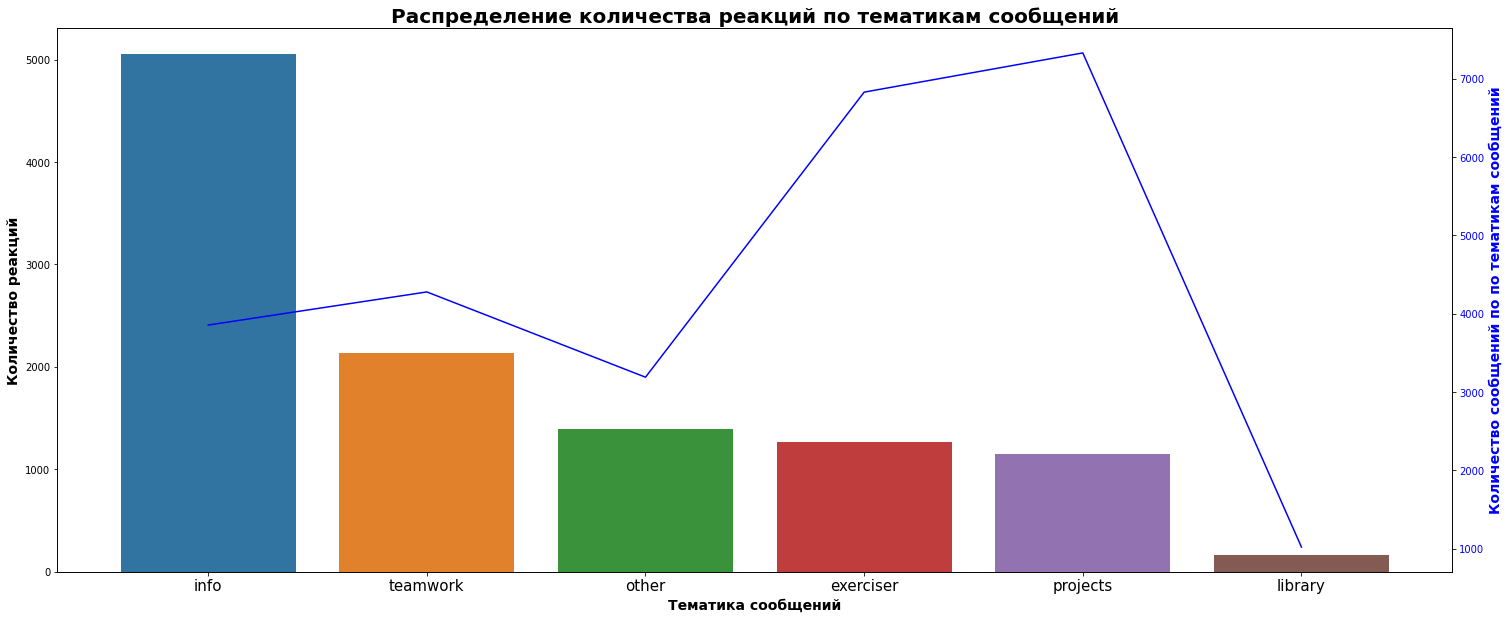

In [105]:
ax6 = plt.subplots(figsize=(25, 10))
ax6 = sns.barplot(y=group_theme['Общее количество реакций'], x=group_theme.index)
ax6.set_title('Распределение количества реакций по тематикам сообщений', fontsize=20, fontweight="bold")
ax6.set_xlabel('Тематика сообщений', fontsize=14, fontweight="bold")
ax6.set_ylabel('Количество реакций', fontsize=14, fontweight="bold")
plt.xticks(fontsize = 15)
ax61 = ax6.twinx() 
ax61.set_ylabel('Количество сообщений по по тематикам сообщений', color = 'blue', fontsize=14, fontweight="bold") 
ax61.plot(group_theme_mes, color = 'blue') 
ax61.tick_params(axis ='y', labelcolor = 'blue');

Мы посмотрели общее количество реакций по тематикам сообщений: реакции есть для сообщений всех тематик.

In [106]:
group_theme_mean = df_wr_mn.pivot_table(index='theme', values=['all_reactions'], aggfunc='mean').round(2).sort_values(by='all_reactions', ascending=False) #сводная таблица с средним количеством реакций для разных тематик обучения
group_theme_mean.columns = ['Среднее количество реакций']
display(group_theme_mean.sort_values(by='Среднее количество реакций', ascending=False).T)

theme,info,teamwork,other,exerciser,library,projects
Среднее количество реакций,1.31,0.5,0.44,0.19,0.16,0.16


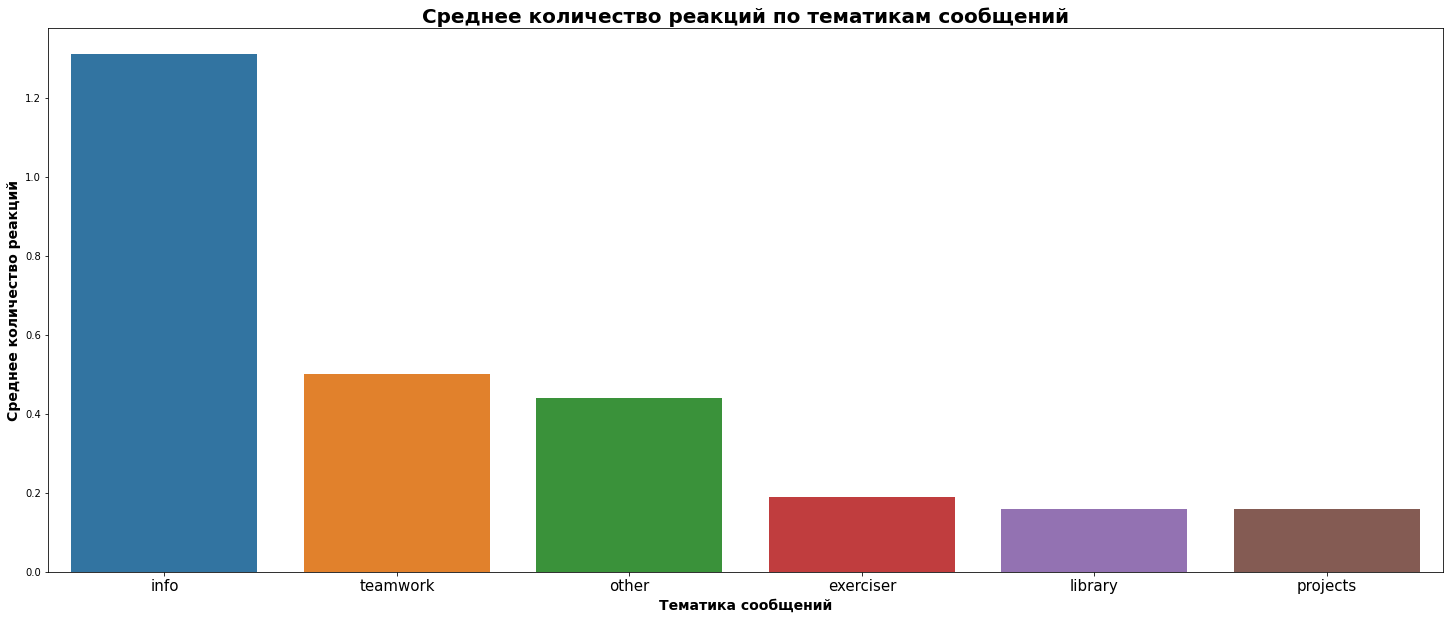

In [107]:
ax7 = plt.subplots(figsize=(25, 10))
ax7 = sns.barplot(y=group_theme_mean['Среднее количество реакций'], x=group_theme_mean.index)
ax7.set_title('Среднее количество реакций по тематикам сообщений', fontsize=20, fontweight="bold")
ax7.set_xlabel('Тематика сообщений', fontsize=14, fontweight="bold")
ax7.set_ylabel('Среднее количество реакций', fontsize=14, fontweight="bold")
plt.xticks(fontsize = 15);

Мы видим, что среднее количество реакций на сообщения отличается в зависимости от тематики сообщений.\
Наибольшее количество реакций для сообщений тематик info и teamwork - это, наш взгляд, объяснимо, так как студенты в первую очередь реагируют на сообщения информационно-организационного характера.\
На графике выше мы видим, что наибольшее количество сообщений и реакций на них тематики projects. При этом среднее количество реакций для сообщений тематики projects минимальное - это объясняется тем, что на сообщения данной тематики, также как и на сообщения других тематик с низким средним количеством реакций, реакции студентов не требуются: студенты в сообщениях данных тематик обсуждают рабочие учебные вопросы, делятся учебными материалами и т.п.
С учетом изложенного мы можем дать следующую рекомендацию:\
 **- сообщения организационно-информационного характера, на которые требуется обратная связь студентов, что студенты с ними ознакомлены, следует публиковать строго в канале info.**

 <a id="fifth"></a> 
## Общие выводы и итоговые рекомендации

Мы провели исследование активности обратной связи на сообщения и сделали следующие выводы:

1. Длина текста сообщений и количества реакций к сообщениям имеют низкий коэффициент корреляции - 0.17.
   Длина текста сообщений и количество слов в сообщениях имеют низкий коэффициент корреляции - 0.19.
2. Мы выявили интересную зависимость, что чем длиннее сообщение, тем большее количество реакций оно имеет.
3. Наибольшее среднее количество реакций приходится на сообщения, опубликованные в период утро-день.
4. Среднее количество реакций на сообщения отличается в зависимости от направления обучения, по которому было опубликовано сообщение. Соответственно, курс обучения является существенным фактором, определяющим активность обратной связи на сообщения.
5. Среднее количество реакций на сообщения отличается в зависимости от тематики сообщений: студенты в первую очередь реагируют на сообщения информационно-организационного характера.
   
Для повышения активности обратной связи на сообщения мы сформулировали следующие рекомендации:   
1. С учетом установленной зависимости, что чем длиннее сообщение, тем большее количество реакций оно имеет, и с учетом низкой корреляции длины сообщений и количества реакций на сообщения мы сделаем следующую рекомендацию:
 - для повышения активности обратной связи на сообщения не стоит сокращать количество слов в сообщениях в ущерб содержанию; длинный текст не является фактором, который снижает обратную связь на сообщение.
2. Для повышения активности обратной связи сообщения стоит публиковать в начале дня - с утра до обеда.
3. Сообщения организационно-информационного характера нужно публиковать строго в тематической группе info.